# Footprint VHR inputs associated with VHR models for `landcover` and `canopy height`

| Author | Affiliation | Date 
| ---------------- | ---------------- | ---------------- 
| Paul Montesano, PhD | Innovation Lab ; NASA Goddard Space Flight Center | June 2024 

In [1]:
import geopandas as gpd
import pandas as pd
import os, sys
sys.path.append('/home/pmontesa/code/geoscitools')
import footprintlib
import geoscilib

import matplotlib.pyplot as plt
import contextily as ctx
import re
import fiona
import math
import glob

from plotnine import *

/explore/nobackup/people/pmontesa/.nccstmp/ipykernel_702158/3453690895.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib

In [2]:
import importlib
import footprintlib
importlib.reload(footprintlib)

<module 'footprintlib' from '/home/pmontesa/code/geoscitools/footprintlib.py'>

In [3]:
from multiprocessing import Pool
from functools import partial

In [4]:
gdf = gpd.read_file('/explore/nobackup/projects/above/misc/ABoVE_Shrubs/footprints/footprints_toa.gpkg')

In [20]:
gdf.drop(columns=['date']).explore()

### $TOA_{VHR}$

In [16]:
d_TOAvhr_orig = {
    'MAINDIR': '/explore/nobackup/projects/above/misc/ABoVE_Shrubs',
    'RUNNAME': 'toa', 
    'SEARCH_STRING': '/002m/*toa.tif',
    'TYPE_NAME': "$TOA_{VHR}$",
    'SPLIT_STR': '-toa'
}
#d['OUTDIR']=f"{d['MAINDIR']}/footprints"
d_TOAvhr_orig['TARGET_DIR']=f"{d_TOAvhr_orig['MAINDIR']}/{d_TOAvhr_orig['RUNNAME']}*" # predictions dir

print(f"Target dir to be footprinted:\n\t{d_TOAvhr_orig['TARGET_DIR']}")
# output footprints filename
d_TOAvhr_orig['OUT_FOOT_FN'] = os.path.join(d_TOAvhr_orig['MAINDIR'], 'footprints', f"footprints_{d_TOAvhr_orig['RUNNAME']}.gpkg")
print(f"Footprint will be here:\n\t{d_TOAvhr_orig['OUT_FOOT_FN']}")

# Get footprints gdf from a target dir
print(f"{d_TOAvhr_orig['TARGET_DIR']}{d_TOAvhr_orig['SEARCH_STRING']}")

d_TOAvhr_orig['f_list'] = glob.glob(f"{d_TOAvhr_orig['TARGET_DIR']}{d_TOAvhr_orig['SEARCH_STRING']}", recursive=True)
print(f"Search returned {len(d_TOAvhr_orig['f_list'])}")

Target dir to be footprinted:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/toa*
Footprint will be here:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/footprints/footprints_toa.gpkg
/explore/nobackup/projects/above/misc/ABoVE_Shrubs/toa*/002m/*toa.tif
Search returned 3329


In [5]:
d_TOAvhr = {
    'MAINDIR': '/explore/nobackup/projects/above/misc/ABoVE_Shrubs',
    'RUNNAME': 'evhr_', 
    'SEARCH_STRING': '/5-toas/M1BS/*toa.tif',
    'TYPE_NAME': "$TOA_{VHR}$",
    'SPLIT_STR': '-toa'
}
#d['OUTDIR']=f"{d['MAINDIR']}/footprints"
d_TOAvhr['TARGET_DIR']=f"{d_TOAvhr['MAINDIR']}/{d_TOAvhr['RUNNAME']}*" # predictions dir

print(f"Target dir to be footprinted:\n\t{d_TOAvhr['TARGET_DIR']}")
# output footprints filename
d_TOAvhr['OUT_FOOT_FN'] = os.path.join(d_TOAvhr['MAINDIR'], 'footprints', f"footprints_{d_TOAvhr['RUNNAME']}.gpkg")
print(f"Footprint will be here:\n\t{d_TOAvhr['OUT_FOOT_FN']}")

# Get footprints gdf from a target dir
print(f"{d_TOAvhr['TARGET_DIR']}{d_TOAvhr['SEARCH_STRING']}")

d_TOAvhr['f_list'] = glob.glob(f"{d_TOAvhr['TARGET_DIR']}{d_TOAvhr['SEARCH_STRING']}", recursive=True)
print(f"Search returned {len(d_TOAvhr['f_list'])}")

Target dir to be footprinted:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/evhr_*
Footprint will be here:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/footprints/footprints_evhr_.gpkg
/explore/nobackup/projects/above/misc/ABoVE_Shrubs/evhr_*/5-toas/M1BS/*toa.tif
Search returned 323


### $SR_{ccdc}$

In [6]:
d_SRccdc = {
    'MAINDIR': '/explore/nobackup/projects/above/misc/ABoVE_Shrubs',
    'RUNNAME': 'ccdc', 
    'SEARCH_STRING': '/030m/*ccdc.tif',
    'TYPE_NAME': "$SR_{ccdc}$",
    'SPLIT_STR': '-ccdc'
}
d_SRccdc['TARGET_DIR']=f"{d_SRccdc['MAINDIR']}/{d_SRccdc['RUNNAME']}*"

print(f"Target dir to be footprinted:\n\t{d_SRccdc['TARGET_DIR']}")
# output footprints filename
d_SRccdc['OUT_FOOT_FN'] = os.path.join(d_SRccdc['MAINDIR'], 'footprints', f"footprints_{d_SRccdc['RUNNAME']}.gpkg")
print(f"Footprint will be here:\n\t{d_SRccdc['OUT_FOOT_FN']}")

# Get footprints gdf from a target dir
print(f"{d_SRccdc['TARGET_DIR']}{d_SRccdc['SEARCH_STRING']}")

d_SRccdc['f_list'] = glob.glob(f"{d_SRccdc['TARGET_DIR']}{d_SRccdc['SEARCH_STRING']}", recursive=True)
print(f"Search returned {len(d_SRccdc['f_list'])}")

Target dir to be footprinted:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/ccdc*
Footprint will be here:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/footprints/footprints_ccdc.gpkg
/explore/nobackup/projects/above/misc/ABoVE_Shrubs/ccdc*/030m/*ccdc.tif
Search returned 4901


### $SR_{VHR}$

In [7]:
# These in Siberia can be a small set of priority strips for CHM model testing far from training sites

In [9]:
d_SRvhr_siberia = {
    'MAINDIR': '/explore/nobackup/projects/ilab/data/srlite/products/srlite-0.9.15-10282022-qa/10282022-all',
    'RUNNAME': 'Siberia',
    'SEARCH_STRING': '/*sr-02m.tif',
    'TYPE_NAME': "$SR_{VHR}$",
    'SPLIT_STR': '-sr'
}
d_SRvhr_siberia['TARGET_DIR']=f"{d_SRvhr_siberia['MAINDIR']}/{d_SRvhr_siberia['RUNNAME']}*"

print(f"Target dir to be footprinted:\n\t{d_SRvhr_siberia['TARGET_DIR']}")
# output footprints filename
d_SRvhr_siberia['OUT_FOOT_FN'] = os.path.join(d_SRvhr_siberia['MAINDIR'], 'footprints', f"footprints_srlite_chm_priority_{d_SRvhr_siberia['RUNNAME']}.gpkg")
print(f"Footprint will be here:\n\t{d_SRvhr_siberia['OUT_FOOT_FN']}")

# Get footprints gdf from a target dir
print(f"{d_SRvhr_siberia['TARGET_DIR']}{d_SRvhr_siberia['SEARCH_STRING']}")

d_SRvhr_siberia['f_list'] = glob.glob(f"{d_SRvhr_siberia['TARGET_DIR']}{d_SRvhr_siberia['SEARCH_STRING']}", recursive=True)
print(f"Search returned {len(d_SRvhr_siberia['f_list'])}")

Target dir to be footprinted:
	/explore/nobackup/projects/ilab/data/srlite/products/srlite-0.9.15-10282022-qa/10282022-all/Siberia*
Footprint will be here:
	/explore/nobackup/projects/ilab/data/srlite/products/srlite-0.9.15-10282022-qa/10282022-all/footprints/footprints_srlite_chm_priority_Siberia.gpkg
/explore/nobackup/projects/ilab/data/srlite/products/srlite-0.9.15-10282022-qa/10282022-all/Siberia*/*sr-02m.tif
Search returned 26


In [10]:
d_SRvhr_AK2024 = {
    'MAINDIR': '/explore/nobackup/projects/above/misc/ABoVE_Shrubs',
    'RUNNAME': 'srlite_ak_2024',
    'SEARCH_STRING': '/*sr_02m.tif', # note in recent version of EVHR toolkit '-' changes to '_'
    'TYPE_NAME': "$SR_{VHR}$",
    'SPLIT_STR': '_sr'               # note in recent version of EVHR toolkit '-' changes to '_'
}
d_SRvhr_AK2024['TARGET_DIR']=f"{d_SRvhr_AK2024['MAINDIR']}/{d_SRvhr_AK2024['RUNNAME']}*"

print(f"Target dir to be footprinted:\n\t{d_SRvhr_AK2024['TARGET_DIR']}")
# output footprints filename
d_SRvhr_AK2024['OUT_FOOT_FN'] = os.path.join(d_SRvhr_AK2024['MAINDIR'], 'footprints', f"footprints_{d_SRvhr_AK2024['RUNNAME']}.gpkg")
print(f"Footprint will be here:\n\t{d_SRvhr_AK2024['OUT_FOOT_FN']}")

# Get footprints gdf from a target dir
print(f"{d_SRvhr_AK2024['TARGET_DIR']}{d_SRvhr_AK2024['SEARCH_STRING']}")

d_SRvhr_AK2024['f_list'] = glob.glob(f"{d_SRvhr_AK2024['TARGET_DIR']}{d_SRvhr_AK2024['SEARCH_STRING']}", recursive=True)
print(f"Search returned {len(d_SRvhr_AK2024['f_list'])}")

Target dir to be footprinted:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/srlite_ak_2024*
Footprint will be here:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/footprints/footprints_srlite_ak_2024.gpkg
/explore/nobackup/projects/above/misc/ABoVE_Shrubs/srlite_ak_2024*/*sr_02m.tif
Search returned 294


In [11]:
d_SRvhr = {
    'MAINDIR': '/explore/nobackup/projects/above/misc/ABoVE_Shrubs',
    'RUNNAME': 'srlite',
    'SEARCH_STRING': '/002m/*sr-02m.tif',
    'TYPE_NAME': "$SR_{VHR}$",
    'SPLIT_STR': '-sr'
}
d_SRvhr['TARGET_DIR']=f"{d_SRvhr['MAINDIR']}/{d_SRvhr['RUNNAME']}*"

print(f"Target dir to be footprinted:\n\t{d_SRvhr['TARGET_DIR']}")
# output footprints filename
d_SRvhr['OUT_FOOT_FN'] = os.path.join(d_SRvhr['MAINDIR'], 'footprints', f"footprints_{d_SRvhr['RUNNAME']}.gpkg")
print(f"Footprint will be here:\n\t{d_SRvhr['OUT_FOOT_FN']}")

# Get footprints gdf from a target dir
print(f"{d_SRvhr['TARGET_DIR']}{d_SRvhr['SEARCH_STRING']}")

d_SRvhr['f_list'] = glob.glob(f"{d_SRvhr['TARGET_DIR']}{d_SRvhr['SEARCH_STRING']}", recursive=True)
print(f"Search returned {len(d_SRvhr['f_list'])}")

Target dir to be footprinted:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/srlite*
Footprint will be here:
	/explore/nobackup/projects/above/misc/ABoVE_Shrubs/footprints/footprints_srlite.gpkg
/explore/nobackup/projects/above/misc/ABoVE_Shrubs/srlite*/002m/*sr-02m.tif
Search returned 3219


# Footprint

In [17]:
# %%time
# with Pool(processes=35) as pool:
#     f_gdf_lst = pool.map(partial(footprintlib.raster_footprint, DO_DATAMASK=False, GET_ONLY_DATASETMASK=False, R_READ_MODE='r', MANY_CRS=True), f_list)

In [18]:
# footprint_gdf = footprintlib.build_footprint_db(f_gdf_lst, TO_GCS=False, WRITE_GPKG=False, OUT_F_NAME='', OUT_LYR_NAME=d['TYPE_NAME'], DROP_DUPLICATES=True)
# footprint_gdf = footprintlib.get_attributes_from_filename(footprint_gdf, d['TYPE_NAME'], d['SPLIT_STR'])

# footprint_gdf['year_cat'] = footprint_gdf.year.astype(str)
# footprint_gdf['month_cat'] = footprint_gdf.month.astype(str)
# print(footprint_gdf.shape)
# footprint_gdf.to_file(OUT_FOOT_FN, driver='GPKG')

In [17]:
def footprint_gpkg_wrapper(f_list, d, OUT_FOOT_FN, WRITE_GPKG=False):
    
    with Pool(processes=10) as pool:
        f_gdf_lst = pool.map(partial(footprintlib.raster_footprint, DO_DATAMASK=False, GET_ONLY_DATASETMASK=False, R_READ_MODE='r', MANY_CRS=True), f_list)
        
    footprint_gdf = footprintlib.build_footprint_db(f_gdf_lst, TO_GCS=False, WRITE_GPKG=False, OUT_F_NAME='', OUT_LYR_NAME=d['TYPE_NAME'], DROP_DUPLICATES=True)
    footprint_gdf = footprintlib.get_attributes_from_filename(footprint_gdf, d['TYPE_NAME'], d['SPLIT_STR'])

    footprint_gdf['year_cat'] = footprint_gdf.year.astype(str)
    footprint_gdf['month_cat'] = footprint_gdf.month.astype(str)
    print(footprint_gdf.shape)
    
    if WRITE_GPKG:
        print(d['OUT_FOOT_FN'])
        footprint_gdf.to_file(OUT_FOOT_FN, driver='GPKG')
    
    return footprint_gdf

In [18]:
%%time
footprint_gdf_list = []
for d in [d_TOAvhr_orig]: #[d_SRvhr_siberia, d_SRvhr_AK2024]: #, d_TOAvhr_orig, d_TOAvhr, d_SRccdc, d_SRvhr]:
    footprint_gdf_list.append(footprint_gpkg_wrapper(d['f_list'], d, d['OUT_FOOT_FN'], WRITE_GPKG=True))

Building GDF from list...
(3329, 14)
/explore/nobackup/projects/above/misc/ABoVE_Shrubs/footprints/footprints_toa.gpkg
CPU times: user 3.96 s, sys: 907 ms, total: 4.87 s
Wall time: 27.1 s


In [13]:
footprint_srsiberia_gdf = footprint_gdf_list[0]
footprint_toa_orig_gdf = footprint_gdf_list[1]
footprint_toa_evhr_gdf = footprint_gdf_list[2]
footprint_ccdc_gdf = footprint_gdf_list[3]
footprint_sr_gdf = footprint_gdf_list[4]

In [23]:
footprint_toa_orig_gdf[(footprint_toa_orig_gdf.month == 7) | (footprint_toa_orig_gdf.month == 8)].shape

(1336, 14)

<Axes: xlabel='date'>

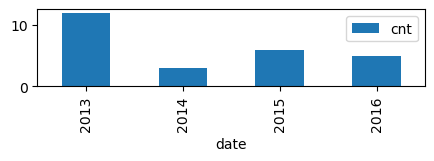

In [14]:
footprint_srsiberia_gdf.groupby([footprint_srsiberia_gdf["date"].dt.year]).aggregate(cnt = ('year', 'count')).plot(kind='bar', figsize=(5,1))

(323, 14)

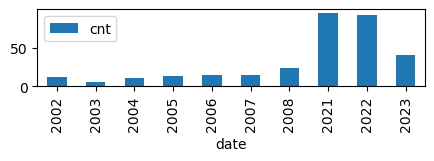

In [25]:
footprint_toa_evhr_gdf.groupby([footprint_toa_evhr_gdf["date"].dt.year]).aggregate(cnt = ('year', 'count')).plot(kind='bar', figsize=(5,1))
footprint_toa_evhr_gdf.shape

<AxesSubplot: xlabel='date'>

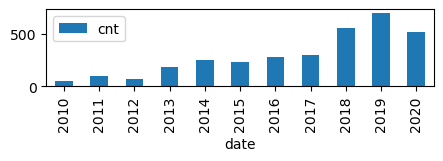

In [14]:
footprint_sr_gdf.groupby([footprint_sr_gdf["date"].dt.year]).aggregate(cnt = ('year', 'count')).plot(kind='bar', figsize=(5,1))

<AxesSubplot: xlabel='date,date'>

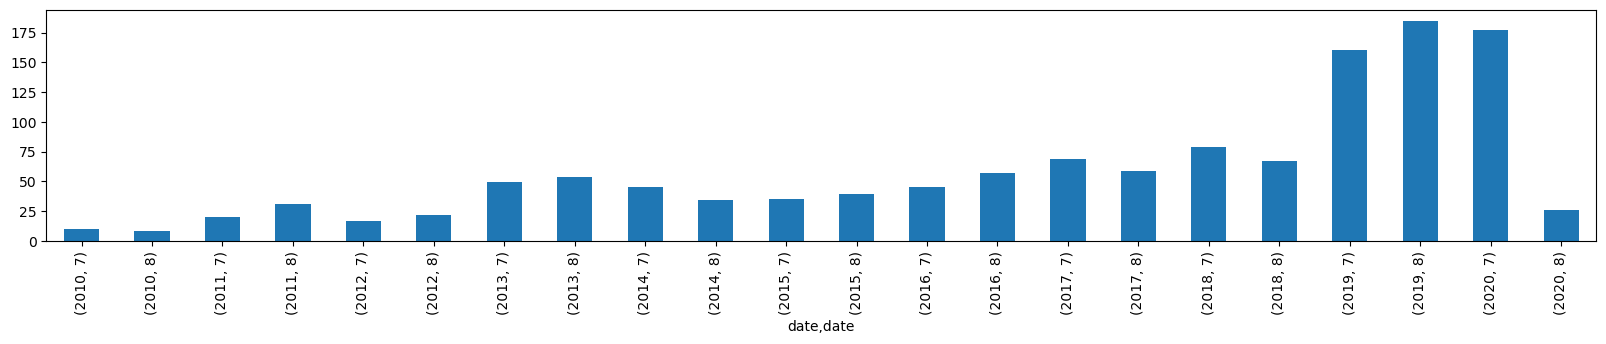

In [15]:
#footprint_gdf.year_cat.hist(figsize=(5,1))
footprint_sr_gdf[(footprint_sr_gdf.month == 7) | (footprint_sr_gdf.month == 8)].groupby(
    [footprint_sr_gdf["date"].dt.year, footprint_sr_gdf["date"].dt.month]
).aggregate(cnt = ('year', 'count')).plot(kind="bar", figsize=(20,3), legend=False)

## GET PROJECT SPECIFIC AOI to trim down on the footprints - limiting to areas we care about now (and for which we have the best training)

In [16]:
footprint_sr_gdf.sensor.unique()
#footprint_gdf[footprint_gdf.sensor=='GE01']

array(['WV02', 'WV03'], dtype=object)

In [17]:
# (
#  ggplot(  footprint_sr_gdf[footprint_sr_gdf.sensor=='GE01'], aes(x='date', y='month_cat'))
#     + geom_point(aes(color='sensor'), size=2, alpha=0.5)
#     + theme_bw() 
#     + theme(figure_size=(5, 3))

# )

In [27]:
MAP_TILES = 'https://titiler.maap-project.org/mosaics/5aef4f92-b4ac-4864-add8-ed5320b3232f/tiles/{z}/{x}/{y}@1x?rescale=0%2C30&bidx=1&colormap_name=inferno'

In [29]:
footprint_toa_evhr_gdf[(footprint_toa_evhr_gdf.month == 7) | (footprint_toa_evhr_gdf.month == 8)].drop('date', axis=1).cx[-170:-120,40:75].explore(column='sensor', cmap='magma',
                                                               style_kwds={'fillOpacity':0.5, 'color':'black', 'stroke':False}, 
                                                               legend=True, height=500, 
                                                                #tiles = MAP_TILES,
                                                                attr=' '
                                                              )

In [57]:
footprint_gdf.drop('date', axis=1)[(footprint_gdf.month == 7) | 
                                   (footprint_gdf.month == 8)].cx[-170:-120,40:75].explore(column='month_cat', cmap='inferno', 
                                                                                        style_kwds={'fillOpacity':0.5, 'stroke':False}, 
                                                                                        legend_kwds={'label': "Acquisition year", "location":'top', 'shrink': 0.5, 'orientation': "horizontal"},
                                                                                        #m=m
                                                                                          )